<a href="https://colab.research.google.com/github/dhanan99/Audio-Classification/blob/main/audio_classification_with_87_2_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratory Data Analysis

#### Importing Libraries

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

#### Plotting audio waves

In [ ]:
filename='/content/drive/MyDrive/genre classification/urbansound/archive/fold1/101415-3-0-2.wav'

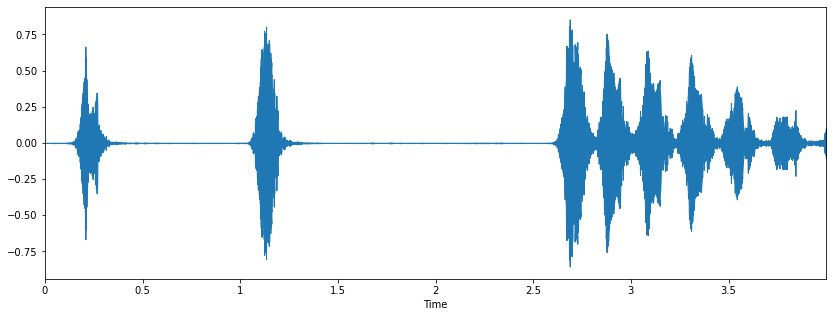

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate


22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate


48000

In [ ]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [ ]:
data

array([-0.00011783, -0.00017157, -0.00017749, ..., -0.04598654,
       -0.04624664, -0.05089863], dtype=float32)

#### CSV containing details about the data

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/genre classification/urbansound/archive/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
metadata['class'].value_counts()


drilling            1000
engine_idling       1000
dog_bark            1000
children_playing    1000
street_music        1000
air_conditioner     1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

# Data Preprocessing using Librosa and scipy
##### Librosa automatically changes every .wav file to mono type whereas scipy doesn't. Also amplitide values in librosa are normalised between -1 to 1 but in scipy it keeps as it is. Below shown .wav file is stereo type but librosa converted it to mono type and also amplitude values are normalised.

In [ ]:
audio_file_path='/content/drive/MyDrive/genre classification/urbansound/archive/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)


In [ ]:
print(librosa_audio_data)


[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


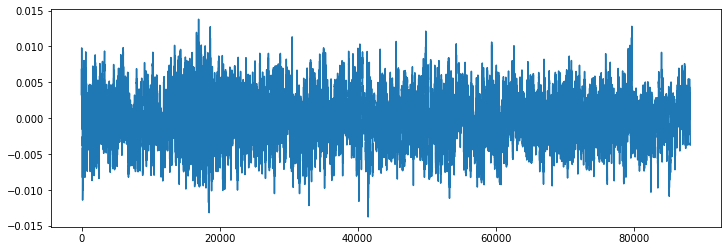

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
wave_sample_rate, wave_audio = wav.read(audio_file_path)


In [ ]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

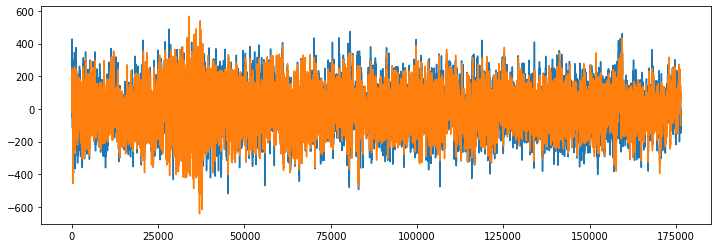

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

## Extracting Features using Mel-Frequency Cepstral Coefficients(MFCC)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs


array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513969e+02,  1.11970390e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260937e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15441895e+00, -1.03232269e+01, -7.39410734e+00],
       ...,
       [-7.82766438e+00, -5.03880644e+00, -4.48165131e+00, ...,
        -1.90693259e-01,  4.34143877e+00,  1.00339069e+01],
       [-1.91763473e+00, -8.02736938e-01, -1.20930755e+00, ...,
        -1.23640180e-01,  2.90505886e-02,  9.22017217e-01],
       [-3.88129652e-01,  3.09316814e-01,  6.72155762e+00, ...,
        -2.33736706e+00, -4.25179911e+00, -2.31322789e+00]], dtype=float32)

In [ ]:
audio_dataset_path = '/content/drive/MyDrive/genre classification/urbansound/archive/'

### Function to extract features from every audio file

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
import os
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [32:03,  2.62it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [1:14:29,  2.20it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [1:14:30,  2.72it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [1:17:36,  1.88it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [ ]:
extracted_features_df.to_csv(r'/content/drive/MyDrive/genre classification/urbansound/features.csv')


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape


(8732, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Splitting data into train and test set

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train


array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape


(6985, 40)

In [ ]:
X_test.shape


(1747, 40)

In [ ]:
y_train.shape


(6985, 10)

In [ ]:
y_test.shape


(1747, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y.shape[1]


### Model


In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer="adam")

### Training 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=os.getcwd()+'audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
216/219 [============================>.] - ETA: 0s - loss: 7.5042 - accuracy: 0.1591
Epoch 00001: val_loss improved from inf to 2.11930, saving model to /contentaudio_classification.hdf5
219/219 [==============================] - 2s 6ms/step - loss: 7.4559 - accuracy: 0.1589 - val_loss: 2.1193 - val_accuracy: 0.2416
Epoch 2/200
212/219 [============================>.] - ETA: 0s - loss: 2.2651 - accuracy: 0.2152
Epoch 00002: val_loss improved from 2.11930 to 2.02422, saving model to /contentaudio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.2586 - accuracy: 0.2160 - val_loss: 2.0242 - val_accuracy: 0.2444
Epoch 3/200
211/219 [===========================>..] - ETA: 0s - loss: 1.9913 - accuracy: 0.2826
Epoch 00003: val_loss improved from 2.02422 to 1.87766, saving model to /contentaudio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.9959 - accuracy: 0.2822 - val_loss: 1.8777 - val_accuracy: 0.3360
Ep

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8746422529220581


In [ ]:
np.argmax(model.predict(X_test), axis=-1)

array([5, 4, 4, ..., 1, 2, 2])

### Prediction

In [ ]:
def print_prediction(file_name):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)

    predicted_vector = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
    
    predicted_class = labelencoder.inverse_transform(predicted_vector)
    
    print("The predicted class is:", predicted_class[0], '\n') 

In [ ]:
filename="/content/drive/MyDrive/genre classification/urbansound/archive/fold7/102853-8-0-2.wav"

print_prediction(filename)

The predicted class is: siren 

